In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def clean_text(text):
    text = text.lower().replace('\n', '')
    text = text.replace('€' , 'euros').replace('m²' , 'squaremeter')
    text = text.replace('ä' , 'ae').replace('Ä' , 'Ae')
    text = text.replace('ö' , 'oe').replace('Ö' , 'Oe')
    text = text.replace('ü' , 'ue').replace('Ü' , 'Ue').replace('ß', 'ss')
    return text

def data_cleaning(df):
    df = df[((df.text_zimmer.notnull()) |(df.text_zimmer.notnull())) |(df.text_zimmer.notnull())]
    if 'link' in df.columns:
        if is_string_dtype(df['link']):
            df['offer_id'] = df['link'].str[-12:-5]
    if 'miete' in df.columns:
        if is_string_dtype(df['miete']):
            df.miete = df.miete.str.replace('euros','').astype(int)
            
    if 'groesse' in df.columns:
        if is_string_dtype(df['groesse']):      
            df['groesse'] = df['groesse'].str.replace('squaremeter','').replace('none','0').astype(int)
    if 'wohnungsgroesse' in df.columns:
        if is_string_dtype(df['wohnungsgroesse']):
            df['wohnungsgroesse'] = df['wohnungsgroesse'].str.replace('squaremeter','').replace('none','0').astype(int)
    if 'nebenKosten' in df.columns:     
        if is_string_dtype(df['nebenKosten']):
            df['nebenKosten'] = df['nebenKosten'].str.replace('euros','').replace('n.a.','0').replace('none','0').astype(int)
    if 'kaution' in df.columns:
        if is_string_dtype(df['kaution']):
            df['kaution'] = df['kaution'].str.replace('euros','').replace('none','0').astype(int)
    if 'sonstigeKosten' in df.columns:
        if is_string_dtype(df['sonstigeKosten']):
            df['sonstigeKosten'] = df['sonstigeKosten'].str.replace('euros','').replace('none','0').astype(int)
    if 'abstandszahlung' in df.columns:
        if is_string_dtype(df['abstandszahlung']):
            df['abstandszahlung'] = df['abstandszahlung'].str.replace('euros','').replace('none','0').astype(int)
    if 'MitgliedSeit' in df.columns:
        if is_string_dtype(df['MitgliedSeit']):
            df['MitgliedSeit'][(df['MitgliedSeit']=='none')|df.MitgliedSeit.isnull()] = '2018-01-01'
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Januar','01-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Februar','02-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Maerz','03-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('April','04-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Mai','05-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Juni','06-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Juli','07-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('August','08-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('September','09-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Oktober','10-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('November','11-')
            df['MitgliedSeit'] = df['MitgliedSeit'].str.replace('Dezember','12-')
            
    if 'text_zimmer' in df.columns:
        if is_string_dtype(df['text_zimmer']):
            df['text_zimmer'] = df['text_zimmer'].fillna(' ')
            #df['text_zimmer'] = df['text_zimmer'].apply(clean_text)
    if 'text_lage' in df.columns:
        if is_string_dtype(df['text_lage']):
            df['text_lage'] = df['text_lage'].fillna(' ')
            #df['text_lage'] = df['text_lage'].apply(clean_text)
    if 'text_sonstige' in df.columns:
        if is_string_dtype(df['text_sonstige']):
            df['text_sonstige'] = df['text_sonstige'].fillna(' ')
            #df['text_sonstige'] = df['text_sonstige'].apply(clean_text)
    if 'stadtteil' in df.columns:
        if is_string_dtype(df['stadtteil']):
            df['stadtteil'] = df['stadtteil'].str.replace('berlin','')
            df['stadtteil'] = df['stadtteil'].fillna(' ')
            df['stadtteil'] = df['stadtteil'].apply(clean_text)
    df['full_text'] = df['text_zimmer'].astype(str) + df['text_lage'].astype(str) + df['text_sonstige'].astype(str)
    #df.dropna(inplace=True)
    if 'freiab' in df.columns:
        if is_string_dtype(df['freiab']):
            df['freiab'] = pd.to_datetime(df['freiab'], format = '%d.%m.%Y')
    if 'freibis' in df.columns:
        if is_string_dtype(df['freibis']):
            df['freibis'][df['freibis']=='empty'] = '01.06.2020'
            df['freibis'] = pd.to_datetime(df['freibis'], format = '%d.%m.%Y')
            df[df['freibis']-df['freiab'] < pd.to_timedelta('90 days')]= None   # this drops around 170 records 
    
    df['bewohner'] = df['bewohner_M']+df['bewohner_W']
    df['freiraum'] = df['freiraum_egal']+df['freiraum_M']+df['freiraum_W']
    
    to_drop = ['headline', 'text_WGleben', 'request_sent','link','SCHUFA', 'rauchen',\
               'link_shorten','gesucht', 'umzugsfirma', 'address_part1', 'address_part2',\
               'bewohner_M', 'bewohner_W', 'freiraum_egal', 'freiraum_M', 'freiraum_W']
    for column in to_drop:
        if column in df.columns:
            df.drop(column, axis=1, inplace=True)
            
    df = df[df['miete']>200]
    return df 

In [3]:
old_offers = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/wggesucht_angebote_full_31may.csv')
old_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
eintrag            601 non-null object
miete              601 non-null object
groesse            601 non-null object
stadtteil          601 non-null object
freiab             601 non-null object
freibis            601 non-null object
bewohner_M         601 non-null int64
bewohner_W         601 non-null int64
freiraum_egal      601 non-null int64
freiraum_M         601 non-null int64
freiraum_W         601 non-null int64
link               601 non-null object
headline           0 non-null float64
nebenKosten        601 non-null object
sonstigeKosten     601 non-null object
kaution            601 non-null object
abstandszahlung    601 non-null object
SCHUFA             601 non-null object
address_part1      601 non-null object
address_part2      601 non-null object
umzugsfirma        601 non-null object
wohnungsgroesse    601 non-null object
rauchen            601 non-null object
gesu

In [4]:
old_offers = data_cleaning(old_offers)
old_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 597
Data columns (total 19 columns):
eintrag            411 non-null object
miete              411 non-null float64
groesse            411 non-null float64
stadtteil          411 non-null object
freiab             411 non-null datetime64[ns]
freibis            411 non-null datetime64[ns]
nebenKosten        411 non-null float64
sonstigeKosten     411 non-null float64
kaution            411 non-null float64
abstandszahlung    411 non-null float64
wohnungsgroesse    411 non-null float64
text_zimmer        411 non-null object
text_lage          411 non-null object
text_sonstige      411 non-null object
MitgliedSeit       411 non-null object
offer_id           411 non-null object
full_text          411 non-null object
bewohner           411 non-null float64
freiraum           411 non-null float64
dtypes: datetime64[ns](2), float64(9), object(8)
memory usage: 64.2+ KB


In [5]:
new_offers = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/wggesucht_angebote_full_1Jul.csv')

new_offers = data_cleaning(new_offers)
new_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 577
Data columns (total 19 columns):
eintrag            540 non-null object
miete              540 non-null float64
groesse            540 non-null float64
stadtteil          540 non-null object
freiab             540 non-null datetime64[ns]
freibis            540 non-null datetime64[ns]
nebenKosten        540 non-null float64
sonstigeKosten     540 non-null float64
kaution            540 non-null float64
abstandszahlung    540 non-null float64
wohnungsgroesse    540 non-null float64
text_zimmer        540 non-null object
text_lage          540 non-null object
text_sonstige      540 non-null object
MitgliedSeit       540 non-null object
offer_id           540 non-null object
full_text          540 non-null object
bewohner           540 non-null float64
freiraum           540 non-null float64
dtypes: datetime64[ns](2), float64(9), object(8)
memory usage: 84.4+ KB


In [6]:
all_offers = pd.concat([old_offers, new_offers], axis=0)
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 577
Data columns (total 19 columns):
eintrag            951 non-null object
miete              951 non-null float64
groesse            951 non-null float64
stadtteil          951 non-null object
freiab             951 non-null datetime64[ns]
freibis            951 non-null datetime64[ns]
nebenKosten        951 non-null float64
sonstigeKosten     951 non-null float64
kaution            951 non-null float64
abstandszahlung    951 non-null float64
wohnungsgroesse    951 non-null float64
text_zimmer        951 non-null object
text_lage          951 non-null object
text_sonstige      951 non-null object
MitgliedSeit       951 non-null object
offer_id           951 non-null object
full_text          951 non-null object
bewohner           951 non-null float64
freiraum           951 non-null float64
dtypes: datetime64[ns](2), float64(9), object(8)
memory usage: 148.6+ KB


In [7]:
new_marker = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/offer_tracking.csv')

In [8]:
new_marker.columns = ['offer_id', 'request_sent', 'deleted','deactivated', 'scam','suspected']
new_marker = new_marker[['offer_id','deleted','scam']]

new_marker['offer_id'] = new_marker['offer_id'].astype(str)
new_marker.drop_duplicates('offer_id',inplace=True)
new_marker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 124
Data columns (total 3 columns):
offer_id    123 non-null object
deleted     5 non-null float64
scam        11 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [9]:
all_offers['MitgliedSeit'] = pd.to_datetime(all_offers['MitgliedSeit']).dt.date
all_offers = all_offers.merge(new_marker, on='offer_id',how='left')
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 950
Data columns (total 21 columns):
eintrag            951 non-null object
miete              951 non-null float64
groesse            951 non-null float64
stadtteil          951 non-null object
freiab             951 non-null datetime64[ns]
freibis            951 non-null datetime64[ns]
nebenKosten        951 non-null float64
sonstigeKosten     951 non-null float64
kaution            951 non-null float64
abstandszahlung    951 non-null float64
wohnungsgroesse    951 non-null float64
text_zimmer        951 non-null object
text_lage          951 non-null object
text_sonstige      951 non-null object
MitgliedSeit       951 non-null object
offer_id           951 non-null object
full_text          951 non-null object
bewohner           951 non-null float64
freiraum           951 non-null float64
deleted            1 non-null float64
scam               11 non-null float64
dtypes: datetime64[ns](2), float64(11), object(8)
me

In [10]:
all_offers['offer_id'][all_offers['scam']==1]

29     6699669
44     6699616
51     6698435
572    6726755
658    6724510
664    6724794
804    6733938
924    6769136
Name: offer_id, dtype: object

In [11]:
all_offers[['deleted','scam']] = all_offers[['deleted','scam']].fillna(0)
all_offers = all_offers.dropna()
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 950
Data columns (total 21 columns):
eintrag            951 non-null object
miete              951 non-null float64
groesse            951 non-null float64
stadtteil          951 non-null object
freiab             951 non-null datetime64[ns]
freibis            951 non-null datetime64[ns]
nebenKosten        951 non-null float64
sonstigeKosten     951 non-null float64
kaution            951 non-null float64
abstandszahlung    951 non-null float64
wohnungsgroesse    951 non-null float64
text_zimmer        951 non-null object
text_lage          951 non-null object
text_sonstige      951 non-null object
MitgliedSeit       951 non-null object
offer_id           951 non-null object
full_text          951 non-null object
bewohner           951 non-null float64
freiraum           951 non-null float64
deleted            951 non-null float64
scam               951 non-null float64
dtypes: datetime64[ns](2), float64(11), object(8)

In [12]:
all_offers['scam'][all_offers['deleted']==1]=1
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 950
Data columns (total 21 columns):
eintrag            951 non-null object
miete              951 non-null float64
groesse            951 non-null float64
stadtteil          951 non-null object
freiab             951 non-null datetime64[ns]
freibis            951 non-null datetime64[ns]
nebenKosten        951 non-null float64
sonstigeKosten     951 non-null float64
kaution            951 non-null float64
abstandszahlung    951 non-null float64
wohnungsgroesse    951 non-null float64
text_zimmer        951 non-null object
text_lage          951 non-null object
text_sonstige      951 non-null object
MitgliedSeit       951 non-null object
offer_id           951 non-null object
full_text          951 non-null object
bewohner           951 non-null float64
freiraum           951 non-null float64
deleted            951 non-null float64
scam               951 non-null float64
dtypes: datetime64[ns](2), float64(11), object(8)

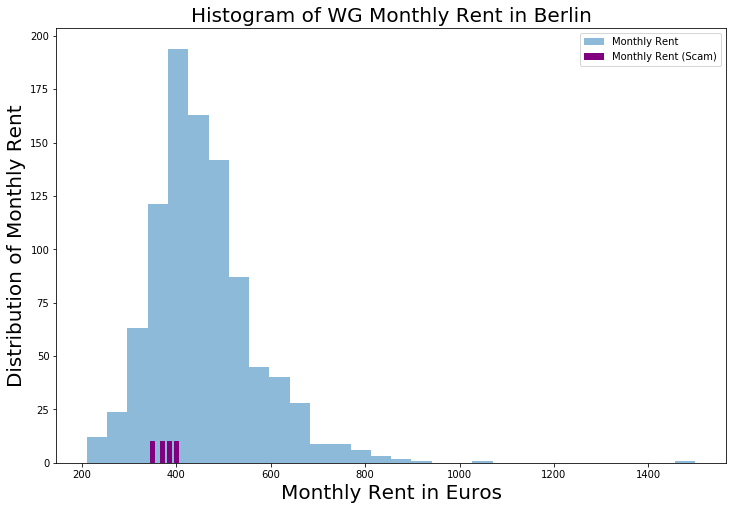

In [13]:
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.miete, bins=30, alpha=0.5, label = 'Monthly Rent')
ax.bar(all_offers.miete[all_offers['scam']==1], height =10, width=10, color= 'purple', label='Monthly Rent (Scam)')
ax.set_title('Histogram of WG Monthly Rent in Berlin', size=20)
ax.set_ylabel('Distribution of Monthly Rent', size=20)
ax.set_xlabel('Monthly Rent in Euros', size = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.savefig('hist_monthlyrent.png', transparent=True)

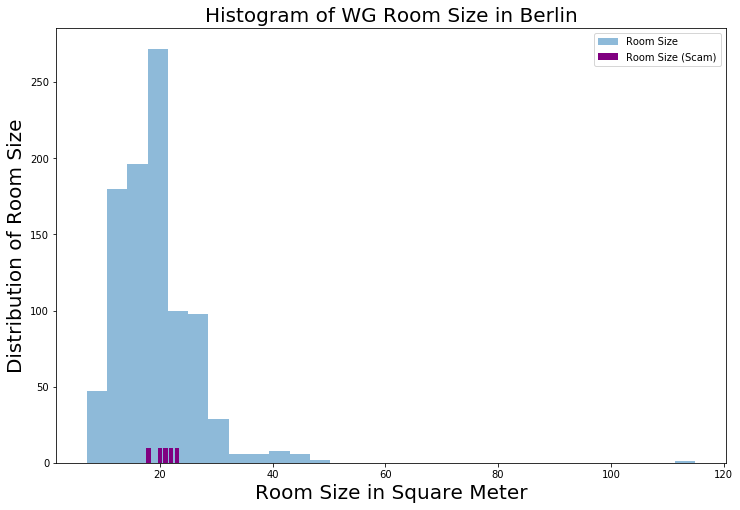

In [40]:
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.groesse, bins=30, alpha=0.5, label = 'Room Size')
ax.bar(all_offers.groesse[all_offers['scam']==1], height =10, color= 'purple', label='Room Size (Scam)')
ax.set_title('Histogram of WG Room Size in Berlin', size=20)
ax.set_ylabel('Distribution of Room Size', size=20)
ax.set_xlabel('Room Size in Square Meter', size = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.savefig('hist_roomsize.png', transparent=True)

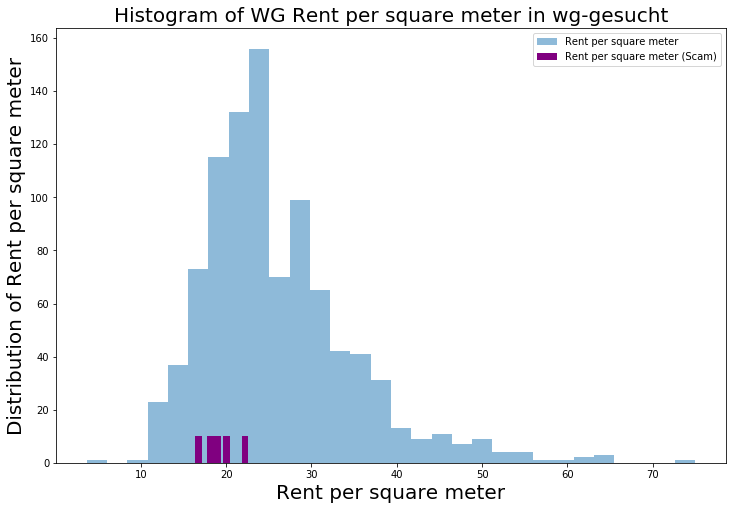

In [47]:
all_offers['rentperm2'] = all_offers.miete/all_offers.groesse
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.rentperm2, bins=30, alpha=0.5, label = 'Rent per square meter')
ax.bar(all_offers.rentperm2[all_offers['scam']==1], height =10, color= 'purple', label='Rent per square meter (Scam)')
ax.set_title('Histogram of WG Rent per square meter in wg-gesucht', size=20)
ax.set_ylabel('Distribution of Rent per square meter', size=20)
ax.set_xlabel('Rent per square meter', size = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.savefig('hist_rentperm2.png', transparent=True)

In [46]:
all_offers.kaution[all_offers['scam']==1]

29     635.0
44     600.0
51       0.0
572      0.0
658      0.0
664      0.0
804    550.0
924      0.0
Name: kaution, dtype: float64

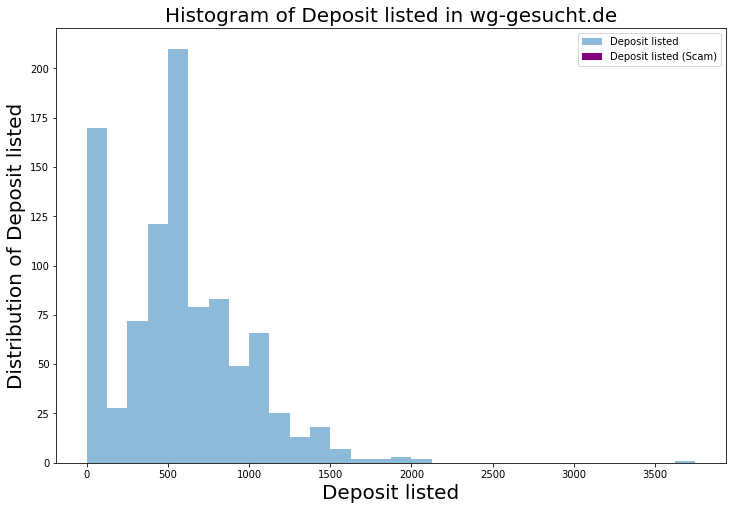

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.kaution, bins=30, alpha=0.5, label = 'Deposit listed')
ax.bar(all_offers.kaution[all_offers['scam']==1], height =100, color= 'purple', label='Deposit listed (Scam)')
ax.set_title('Histogram of Deposit listed in wg-gesucht.de', size=20)
ax.set_ylabel('Distribution of Deposit listed', size=20)
ax.set_xlabel('Deposit listed', size = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.savefig('hist_deposit.png', transparent=True)

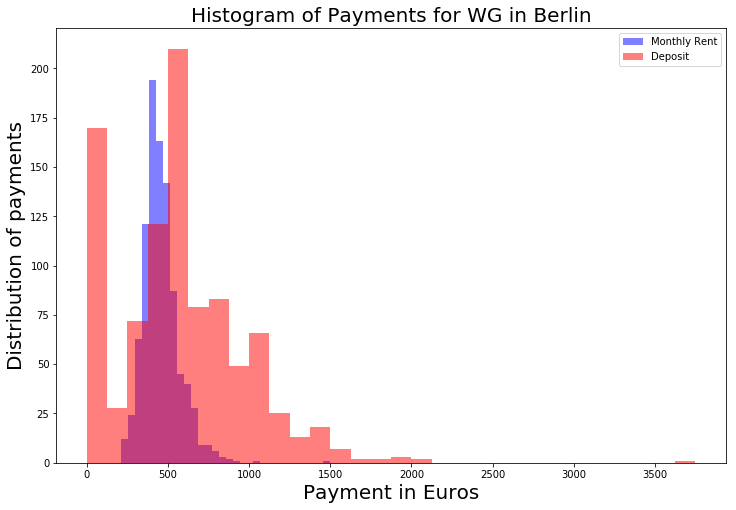

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.miete, bins=30, ls='dashed', lw=3, fc=(0, 0, 1, 0.5), label='Monthly Rent')
ax.hist(all_offers.kaution, bins=30, ls='dotted', lw=3, fc=(1, 0, 0, 0.5), label='Deposit')

ax.set_xlim = (0,2000)
ax.set_title('Histogram of Payments for WG in Berlin', size=20)
ax.set_ylabel('Distribution of payments', size=20)
ax.set_xlabel('Payment in Euros', size = 20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

In [31]:
all_offers.miete[all_offers['scam']==1]

29     385.0
44     400.0
51     400.0
572    400.0
658    400.0
664    400.0
804    370.0
924    400.0
Name: miete, dtype: float64

In [15]:
all_offers.head(10)

,eintrag,miete,groesse,stadtteil,freiab,freibis,nebenKosten,sonstigeKosten,kaution,abstandszahlung,...,text_zimmer,text_lage,text_sonstige,MitgliedSeit,offer_id,full_text,bewohner,freiraum,deleted,scam
0,21.05.2018,440.0,10.0,wedding,2018-06-01,2018-12-31,0.0,0.0,900.0,210.0,...,"!! Bitte nur bewerben, wenn Du mindestens 7 Mo...",Die Wohnung befindet sich in der Nähe des Virc...,Für eine Anmietung werden folgende Dokumente v...,2018-01-01,5526511,"!! Bitte nur bewerben, wenn Du mindestens 7 Mo...",2.0,4.0,0.0,0.0
1,21.05.2018,420.0,19.0,berlintreptow-koepenick,2018-06-01,2020-06-01,0.0,0.0,800.0,0.0,...,Cosy Room designed for students with wide stud...,,,2018-01-01,6698866,Cosy Room designed for students with wide stud...,1.0,1.0,0.0,0.0
2,21.05.2018,420.0,22.0,neukoelln,2018-06-01,2019-06-01,50.0,0.0,370.0,0.0,...,Das zu vermiete Zimmer geht direkt vom Flur ei...,"Du hast in der Nähe Einkaufsmöglichkeiten, man...",Über euer Interesse würde ich mich sehr freuen...,2018-01-01,5947888,Das zu vermiete Zimmer geht direkt vom Flur ei...,1.0,1.0,0.0,0.0
3,21.05.2018,500.0,16.0,kreuzberg,2018-06-01,2018-11-30,0.0,0.0,500.0,0.0,...,"Das Zimmer ist ca. 16qm groß, teilmöbliert mit...",Die Wohnung befindet sich gegenüber vom Görlit...,"Es gibt viele Bars, Cafes, sowie Restaurants d...",2018-01-01,6691063,"Das Zimmer ist ca. 16qm groß, teilmöbliert mit...",0.0,3.0,0.0,0.0
4,21.05.2018,500.0,13.0,adlershof,2018-05-31,2020-06-01,50.0,0.0,500.0,300.0,...,Das Zimmer hat eine Größe von ca.13squaremeter...,Die Wohnung befindet sich im schönen Treptow K...,Kosten: Kaltmiete= 450 EURONebenkosten= 50 EUR...,2018-01-01,6687367,Das Zimmer hat eine Größe von ca.13squaremeter...,1.0,1.0,0.0,0.0
5,21.05.2018,600.0,19.0,prenzlauerberg,2018-05-22,2019-12-01,85.0,0.0,1280.0,0.0,...,German version below--------------------------...,,,2018-01-01,1513311,German version below--------------------------...,2.0,1.0,0.0,0.0
6,21.05.2018,500.0,22.0,charlottenburg,2018-06-01,2018-10-01,50.0,0.0,0.0,0.0,...,"Sanierter Altbau, 1. Etage, möbliert - WG-taug...","Das Haus befindet sich einer ruhigen, schattig...",Der neue Mitbewohner bzw. die neue Mitbewohner...,2018-01-01,2704830,"Sanierter Altbau, 1. Etage, möbliert - WG-taug...",1.0,1.0,0.0,0.0
7,21.05.2018,450.0,12.0,friedrichshain-kreuzberg,2018-06-15,2019-01-15,0.0,0.0,0.0,0.0,...,Ich habe ein schönes Zimmer in meiner Altbauwo...,Die Verkehrsanbindung ist super – alle drei Un...,Bitte ausschliesslich weibliche Interessentinn...,2018-01-01,6474028,Ich habe ein schönes Zimmer in meiner Altbauwo...,1.0,1.0,0.0,0.0
8,21.05.2018,500.0,17.0,grenzeprenzlauerberg,2018-08-10,2019-05-01,110.0,0.0,700.0,0.0,...,Die Wohnung befindet sich im 1 OG. auf der lin...,"Die Wohnung befindet sich in einer grünen, ruh...",,2018-01-01,6698832,Die Wohnung befindet sich im 1 OG. auf der lin...,1.0,1.0,0.0,0.0
9,21.05.2018,470.0,17.0,friedenau,2018-06-01,2020-05-01,70.0,0.0,800.0,0.0,...,"Hallo.Wir wohnen sehr zentral,da die öffentlic...","U9 Walter -Schreiber Platz,S1 Feuerbach Straße...",Wir vermieten nur an Berufstätige !!Studenten ...,2018-01-01,6597059,"Hallo.Wir wohnen sehr zentral,da die öffentlic...",2.0,1.0,0.0,0.0


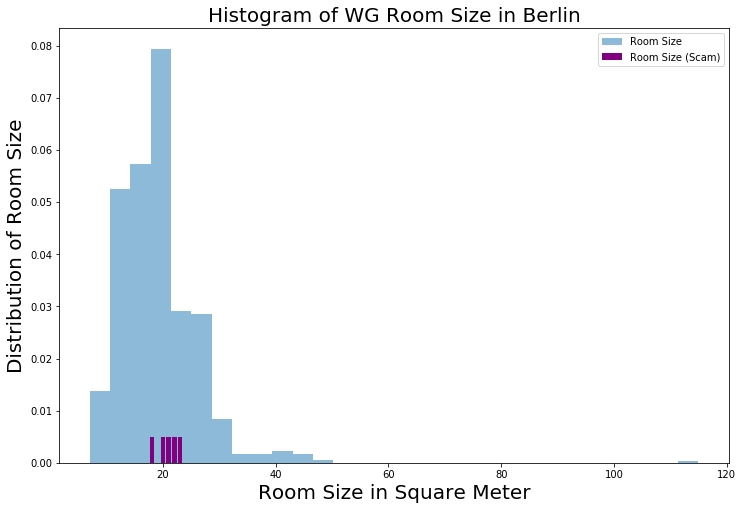

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(all_offers.groesse, normed=True, bins=30, alpha=0.5, label = 'Room Size')
ax.bar(all_offers.groesse[all_offers['scam']==1], height =0.005, color= 'purple', label='Room Size (Scam)')
ax.set_title('Histogram of WG Room Size in Berlin', size=20)
ax.set_ylabel('Distribution of Room Size', size=20)
ax.set_xlabel('Room Size in Square Meter', size = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [48]:
all_offers.groupby('scam').mean()[['miete','kaution','groesse']]

,miete,kaution,groesse
scam,,,
0.0,457.552492,558.633086,19.007423
1.0,394.375000,223.125000,20.250000


In [14]:
import csv
english_stopwords = []
with open('stop_word_list.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for cell in row:
            english_stopwords.append(cell.replace(' ',''))
english_stopwords.append('for')
english_stopwords

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [15]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import imageio

def white_color_func(word, font_size, position, orientation, random_state=None,
 **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = '/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/'
path = path.join(d, "flyhouse.png")
mask_flyhouse=imageio.imread(path)

mask_flyhouse

Image([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ..., 
       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessiehsieh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# use textblob to translate the offers

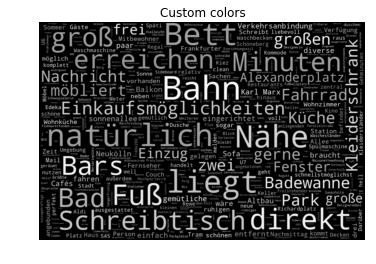

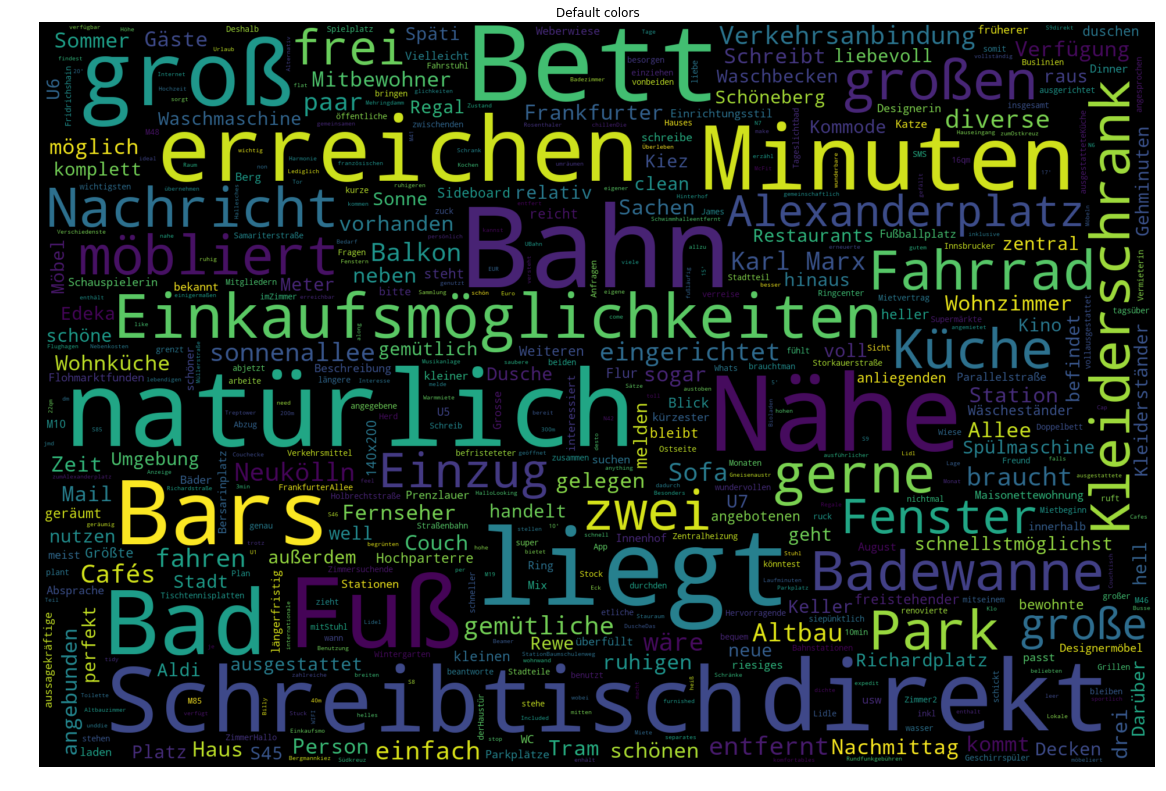

In [17]:
from nltk.corpus import stopwords as sw
# wordcloud for Scammers

nltk_stopwords = sw.words('english') +sw.words('german')

for word in nltk_stopwords:
    word = clean_text(word)

stopwords = ['ich',"and", "the", "of", "to", "einer", 'gibt',
      "eine", "eines", "einem", "einen", "der", "die", "das", 'gut',
      "dass", "daß", "du", "er", "sie", "es", "was", "wer", 'wenn',
      "wie", "wir", "und", "oder", "ohne", "mit", "am", "im", 'wo',
      "in", "aus", "auf", "ist", "sein", "war", "wird", "ihr", 'dann',
      "ihre", "ihres", "ihnen", "ihrer", "als", "fuer", "von",
      "mit", "dich", "dir", "mich", "mir", "mein", "sein",'bin',
      "kein", "durch", "wegen", "wird", "sich", "bei", "beim",
      "noch", "den", "dem", "zu", "zur", "zum", "auf", "ein",
      "auch", "werden", "an", "des", "sein", "sind", "vor",'habe',
      "nicht", "sehr", "um", "unsere", "ohne", "so", "da", "nur",
      "diese", "dieser", "diesem", "dieses", "nach", "ueber",
      "mehr", "hat", "bis", "uns", "unser", "unserer", "unserem",
      "unsers", "euch", "euers", "euer", "eurem", "ihr", "ihres",
      "ihrer", "ihrem", "alle", "vom",'also','kann', 'ab', 'allem','alles',
        'mal','min','hier','sowie','wg','aber','etc','man','ca',
        'ausserdem','haben', 'etwa', 'hast', 'etwas']+ nltk_stopwords

specific_stopwords = ["fick",'room','zimmer', 'sqm', 'qm', 'wohnung'] + list(all_offers['stadtteil'])
for word in specific_stopwords:
    stopwords.append(word)
stopwords = set(stopwords)
    
text = ' '.join(all_offers[all_offers['scam']==1]['full_text'])

wc = WordCloud(max_words=500, mask=mask_flyhouse, stopwords=stopwords,
margin=10,
random_state=1).generate(text)
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.figure(figsize = (20,20))
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.savefig('wordcloud_scam_mix.png', transparent=True)
plt.axis("off")
plt.show()

,word,frequency
28,Bahn,1.000
160,Nähe,0.875
40,Bett,0.875
413,natürlich,0.875
397,liegt,0.875
309,direkt,0.750
83,Fuß,0.750
66,Einkaufsmöglichkeiten,0.625
195,Schreibtisch,0.625
328,erreichen,0.625


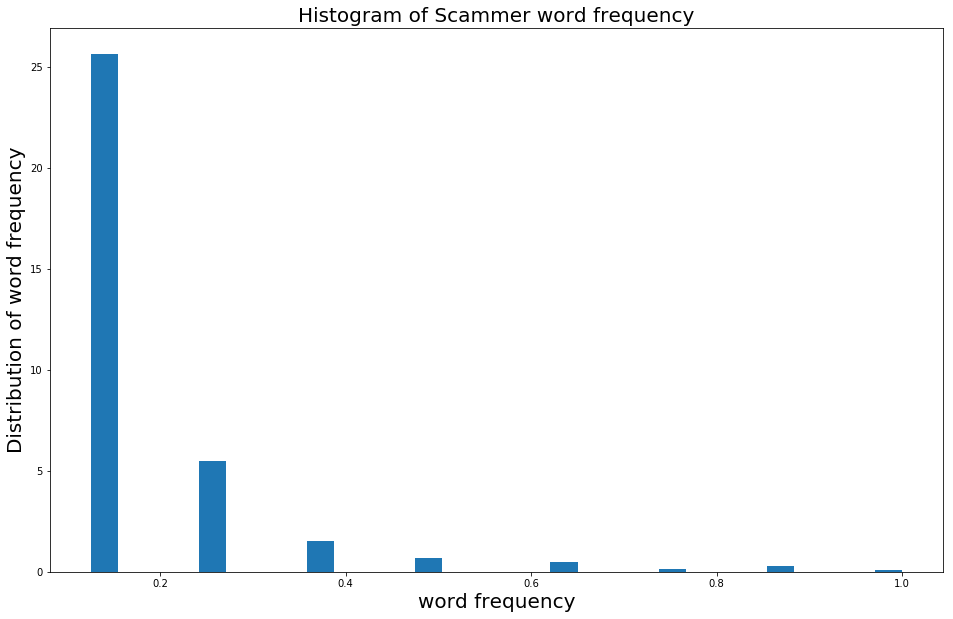

In [18]:
freq_word_scam = pd.DataFrame(pd.DataFrame(wc.words_, index=range(0,len(wc.words_))).iloc[0])
freq_word_scam = freq_word_scam.reset_index()
freq_word_scam.columns = ['word','frequency']

x = freq_word_scam['frequency']
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(x, normed=True, bins=30)
ax.set_title('Histogram of Scammer word frequency', size=20)
ax.set_ylabel('Distribution of word frequency', size=20)
ax.set_xlabel('word frequency', size = 20)

freq_word_scam = freq_word_scam[freq_word_scam['frequency']>0.3].sort_values('frequency',ascending=False)
freq_word_scam

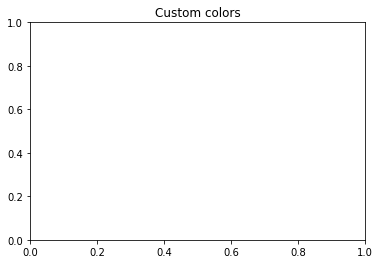

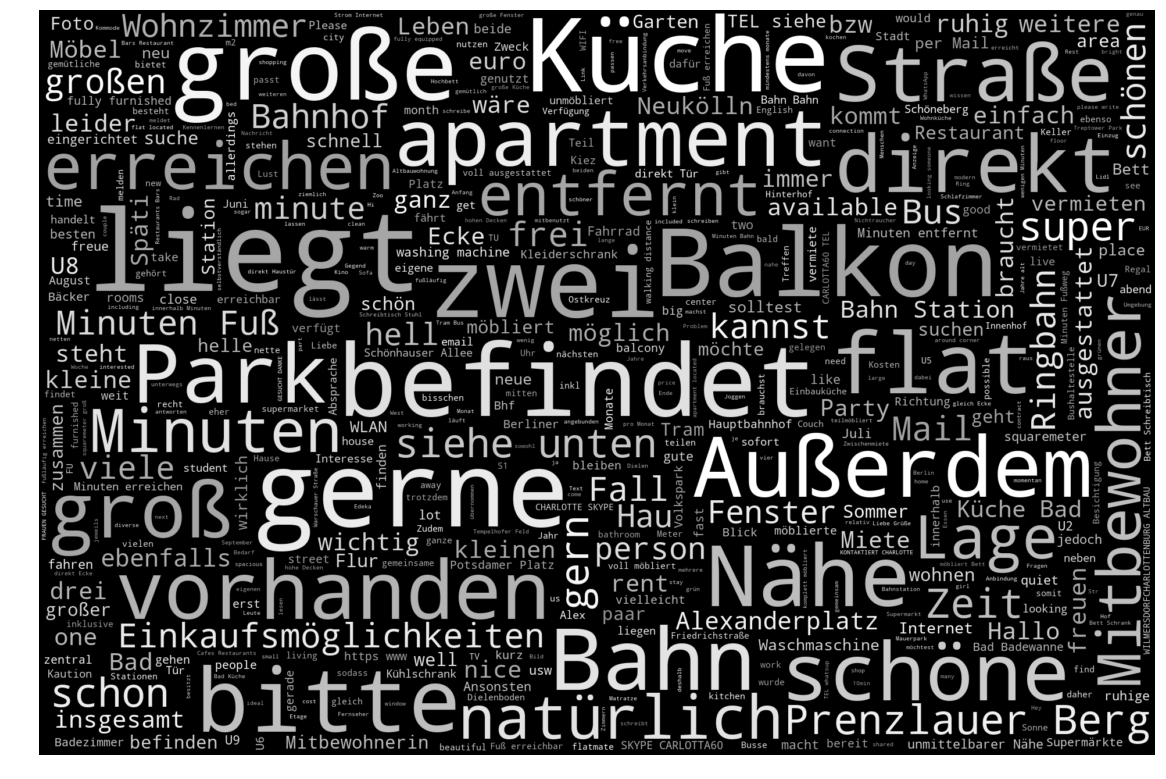

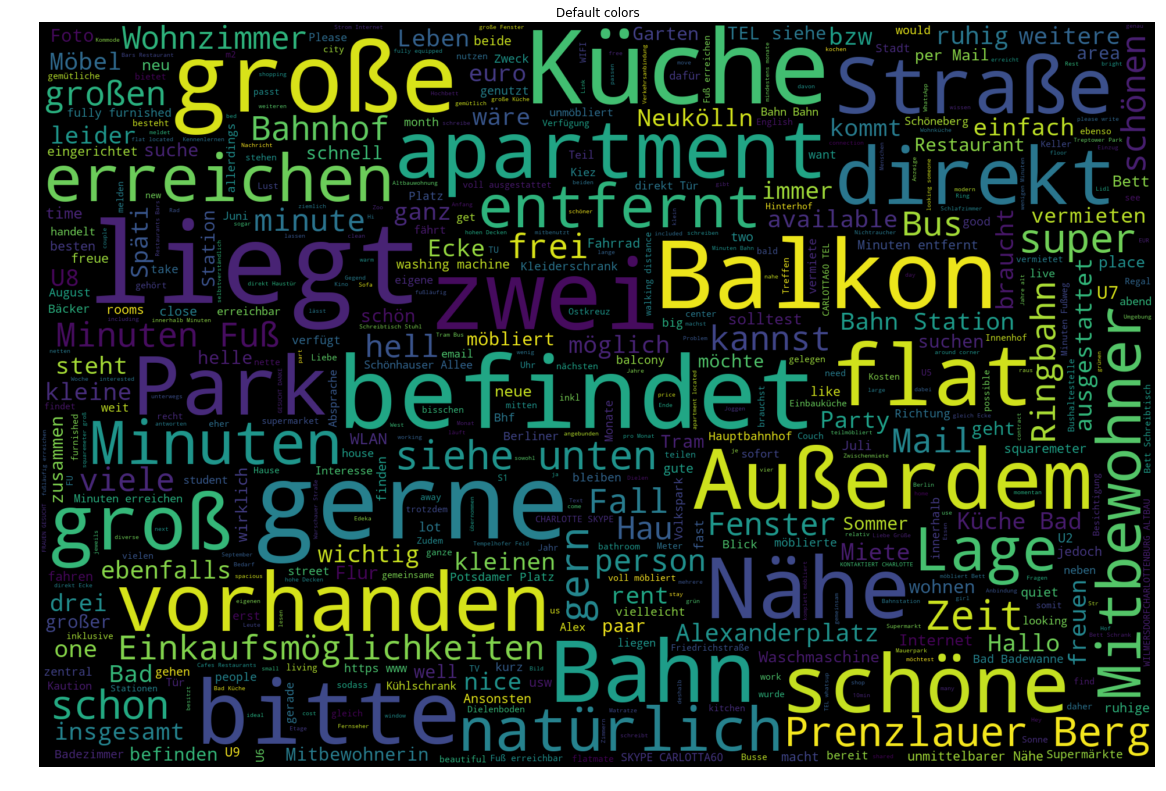

In [28]:
# wordcloud for legitimate users
text = ' '.join(all_offers[all_offers['scam']==0]['full_text'])

wc = WordCloud(max_words=500, mask=mask_flyhouse, stopwords=stopwords,
margin=10,
random_state=1).generate(text)
default_colors = wc.to_array()
plt.title("Custom colors")
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3), interpolation="bilinear")
plt.savefig('wordcloud_legit_mix.png', transparent=True)
plt.axis("off")
plt.figure(figsize = (20,20))
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")

plt.axis("off")
plt.show()

In [20]:
all_offers[all_offers['scam']==1]['full_text'].apply(lambda x: 1 if 'bitte' in x else 0)

29     1
44     0
51     0
59     0
572    0
658    0
664    0
804    0
924    0
Name: full_text, dtype: int64

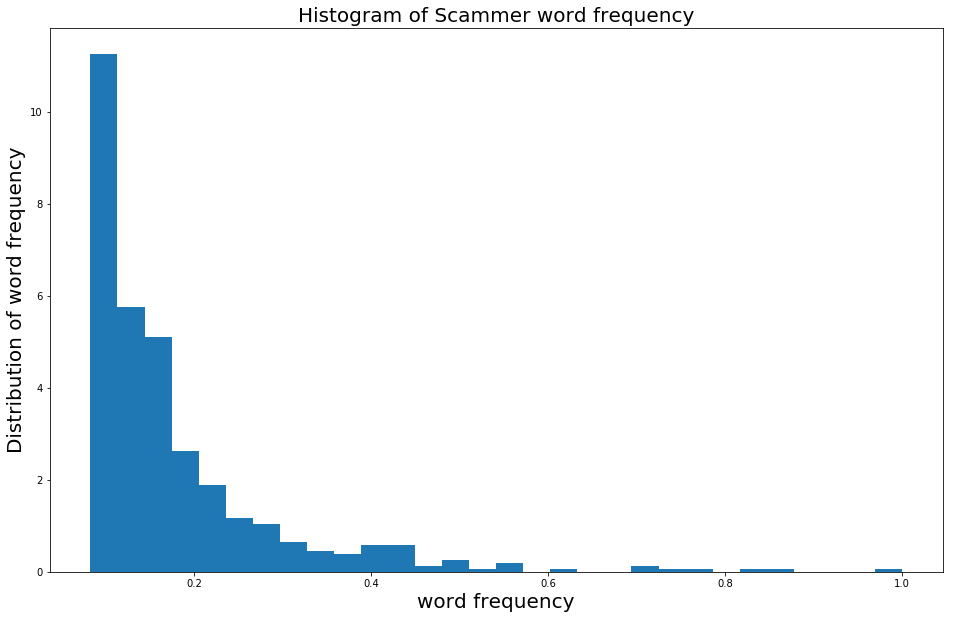

In [21]:
freq_word_legit = pd.DataFrame(pd.DataFrame(wc.words_, index=range(0,len(wc.words_))).iloc[0])
freq_word_legit = freq_word_legit.reset_index()
freq_word_legit.columns = ['word','frequency']

x = freq_word_legit['frequency']
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(x, normed=True, bins=30)
ax.set_title('Histogram of Scammer word frequency', size=20)
ax.set_ylabel('Distribution of word frequency', size=20)
ax.set_xlabel('word frequency', size = 20)

freq_word_legit = freq_word_legit[freq_word_legit['frequency']>0.3].sort_values('frequency',ascending=False)

In [22]:
freq_word_legit[~freq_word_legit['word'].isin(freq_word_scam['word'])]

,word,frequency
217,befindet,0.778878
227,bitte,0.607261
273,flat,0.544554
10,Außerdem,0.534653
474,vorhanden,0.495050
424,schöne,0.488449
204,apartment,0.485149
157,Straße,0.455446
117,Mitbewohner,0.432343
97,Lage,0.432343


In [13]:
from textblob_de import TextBlobDE as TextBlobDE
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

def calculate_sentiment(row):
    tb_obj = TextBlob(row['full_text'])
    row['polarity'] = tb_obj.polarity
    row['subjectivity'] = tb_obj.subjectivity 
   # row['intensity'] = tb_obj.intensity
    return row

def calculate_sentiment_de(row):
    tb_obj = TextBlobDE(row['full_text'])
    row['polarity_de'] = tb_obj.polarity
    row['subjectivity_de'] = tb_obj.subjectivity
   # row['intensity_de'] = tb_obj.intensity
    return row

all_offers['polarity'] = 0
all_offers['subjectivity'] = 0
all_offers['polarity_de'] = 0
all_offers['subjectivy_de'] = 0

all_offers = all_offers.apply(calculate_sentiment, axis=1)
all_offers = all_offers.apply(calculate_sentiment_de, axis=1)

In [14]:
all_offers.groupby('scam').mean()[['miete','polarity','subjectivity', 'polarity_de', 'subjectivy_de']]

,miete,polarity,subjectivity,polarity_de,subjectivy_de
scam,,,,,
0.0,457.666667,0.063702,0.480062,0.305991,0
1.0,389.444444,0.163498,0.510262,0.400941,0


In [25]:
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 950
Data columns (total 26 columns):
eintrag            951 non-null object
miete              951 non-null float64
groesse            951 non-null float64
stadtteil          951 non-null object
freiab             951 non-null datetime64[ns]
freibis            951 non-null datetime64[ns]
nebenKosten        951 non-null float64
sonstigeKosten     951 non-null float64
kaution            951 non-null float64
abstandszahlung    951 non-null float64
wohnungsgroesse    951 non-null float64
text_zimmer        951 non-null object
text_lage          951 non-null object
text_sonstige      951 non-null object
MitgliedSeit       951 non-null object
offer_id           951 non-null object
full_text          951 non-null object
bewohner           951 non-null float64
freiraum           951 non-null float64
deleted            951 non-null float64
scam               951 non-null float64
polarity           951 non-null float64
subjectiv

In [15]:
# data correction
all_offers['MitgliedSeit'][all_offers['offer_id']=='6699669'] = pd.to_datetime('05-2018')
all_offers['MitgliedSeit'][all_offers['offer_id']=='6699616'] = pd.to_datetime('05-2018')

In [42]:
all_offers['miete'][all_offers['popular_area']==0] - all_offers['miete'][all_offers['popular_area']==0].mean()

1       -16.086486
4        63.913514
9        33.913514
13      -16.086486
14      -96.086486
16      153.913514
21     -136.086486
22       43.913514
23     -136.086486
24      -36.086486
25      -36.086486
27     -101.086486
31     -146.086486
32      -30.086486
33      -86.086486
34       53.913514
35       13.913514
38        7.913514
39       63.913514
41      163.913514
45      242.913514
48     1063.913514
54      -84.086486
55      -76.086486
58     -106.086486
61      -36.086486
63       63.913514
65       53.913514
66      -46.086486
67      -86.086486
          ...     
868     149.913514
872     -36.086486
877     -86.086486
881     -26.086486
886     -31.086486
887     -36.086486
888     -96.086486
889      13.913514
892    -106.086486
894      43.913514
895     -86.086486
896      -6.086486
899    -146.086486
900     -36.086486
901     -30.086486
903     -36.086486
904     -56.086486
905    -128.086486
912      13.913514
914    -176.086486
917      58.913514
918      28.

In [26]:
all_offers['miete'][all_offers['popular_area']==0].mean()

436.0864864864865

In [27]:
all_offers['miete'][all_offers['popular_area']==1].mean()

470.3528399311532

In [29]:
(all_offers['freiab'].iloc[0] - pd.to_datetime(all_offers['eintrag'].iloc[0])).days

11

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

def classify_scam(df, num_data_to_train = 800):
    
    # days diff features
    df['days_to_freiab'] = (df['freiab'] - pd.to_datetime(df['eintrag'])).dt.days
    df['days_to_freiab'] = abs(df['days_to_freiab'])
    df['days_to_rent']   = (all_offers['freibis'] - all_offers['freiab']).dt.days
    
    # new user features
    member_filter = pd.to_datetime(df['eintrag'])-pd.to_datetime(df['MitgliedSeit']) < pd.to_timedelta('30 days')
    df['new_user'] = 0
    df['new_user'][member_filter] = 1
    
    areas = ['kreuzberg', 'wedding','neukoelln','charlottenburg','mitte','friedrichshain','prenzlauerberg','moabit']
    area_filter = df.stadtteil.str.contains('|'.join(areas))
    df['popular_area'] = 0
    df['popular_area'][area_filter] = 1
    
    df['miete_delta'] = 0
    df['miete_delta'][df['popular_area']==0] = df['miete'][df['popular_area']==0] - df['miete'][df['popular_area']==0].mean()
    df['miete_delta'][df['popular_area']==1] = df['miete'][df['popular_area']==1] - df['miete'][df['popular_area']==1].mean()
    
    keywords = ['möbliert','unmöbliert','bitte','leider', 'Skype','besichtigung','xx', ':\)']
    # , 'einfach','WhatsApp','Bett', 'unmöbliert','befindet','Nachricht','gerne', 'WhatsApp','Skype'
    for word in keywords:
        df[word] = 0
        df[word][df['full_text'].str.contains(word)] = 1
    
    df['pred_scam'] = 0
    df['proba_scam'] = 0
                    
    data_to_fit_model = df.iloc[:num_data_to_train]

    feature_list = ['miete_delta','groesse', 'days_to_freiab', 'days_to_rent'\
                   ,'polarity_de', 'popular_area', 'new_user'] + keywords   #,'miete_delta'
    #'miete','polarity', 'subjectivity', 'polarity_de' ,'new_user','kaution','nebenKosten','bewohner','freiraum'
    X_train, X_test, y_train, y_test = train_test_split(data_to_fit_model[feature_list], data_to_fit_model['scam'], test_size=0.2, random_state=123456)
    
    RF_model = RandomForestClassifier(random_state=123456, n_estimators=10, max_depth = 3, oob_score=True, class_weight = 'balanced')
    
    #### TUNING
    param_grid = {"n_estimators": [5, 10, 15, 20],
              "max_depth": [3, 5, 7, 10, 13],
              "min_samples_leaf": [2, 3]}
   # sample_weight = np.array([5 if i == 0 else 1 for i in y])
    RF_model.fit(X_train, y_train)
    
    best_score=0
    best_grid = {}
    for param_set in ParameterGrid(param_grid):
        RF_model.set_params(**param_set)
        RF_model.fit(X_train,y_train)
        # save if best
        if RF_model.oob_score_ > best_score:
            best_score = RF_model.oob_score_
            best_grid = param_set

    print("OOB: %0.5f" % best_score) 
    print("Grid:", best_grid)
    
    RF_model.set_params(**best_grid)
    RF_model.fit(data_to_fit_model[feature_list], data_to_fit_model['scam'])
    
    # feature importance
    importance = RF_model.feature_importances_
    importance = pd.DataFrame(importance, index=feature_list, 
                          columns=["Importance"])
    print(importance)

    
    df['pred_scam'].iloc[num_data_to_train:] = RF_model.predict(df[feature_list].iloc[num_data_to_train:])
    #print(pd.DataFrame(RF_model.predict_proba(df[feature_list].iloc[num_data_to_train:])[:, 1]))
    df['proba_scam'].iloc[num_data_to_train:] = RF_model.predict_proba(df[feature_list].iloc[num_data_to_train:])[:, 1]
    
    #print(df['pred_scam'].iloc[num_data_to_train:])
    
    print(len(df.iloc[num_data_to_train:][df['scam']==1]))
    print(len(df.iloc[num_data_to_train:][df['pred_scam']!=df['scam']]))
    print(df[['scam','pred_scam', 'proba_scam']].iloc[num_data_to_train:][(df['pred_scam']!=df['scam'])|(df['scam']==1)])
    #print(df[['pred_scam', 'proba_scam']].iloc[num_data_to_train:])
    print(df[feature_list].iloc[num_data_to_train:][(df['pred_scam']!=df['scam'])|(df['scam']==1)])
    print(df[['scam','pred_scam', 'proba_scam']+feature_list][(df['proba_scam']<0.7)&(df['proba_scam']>0.3)])

In [31]:
classify_scam(all_offers)

OOB: 0.99219
Grid: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 20}
                Importance
miete_delta       0.312993
groesse           0.121807
days_to_freiab    0.049937
days_to_rent      0.031050
polarity_de       0.129888
popular_area      0.065811
new_user          0.200941
möbliert          0.003168
unmöbliert        0.001947
bitte             0.000918
leider            0.042423
Skype             0.000606
besichtigung      0.000000
xx                0.000000
:\)               0.038513
2
4
     scam  pred_scam  proba_scam
804   1.0        1.0    0.725078
807   0.0        1.0    0.828163
910   0.0        1.0    0.575146
921   0.0        1.0    0.529608
924   1.0        0.0    0.393815
     miete_delta  groesse  days_to_freiab  days_to_rent  polarity_de  \
804   -100.35284     20.0              19           697     0.539286   
807    -75.35284     21.0              15           701     0.437179   
910   -120.35284     20.0              11           698     0.242857   

In [20]:
keywords = ['möbliert','unmöbliert','bitte','leider', 'Skype','besichtigung','xx', ':\)']
feature_list = ['miete','miete_delta','groesse', 'days_to_freiab', 'days_to_rent'\
                   ,'polarity_de', 'popular_area', 'new_user'] + keywords
to_save = feature_list + ['scam']
all_offers[to_save].to_csv('train_data.csv',index=False)

In [24]:
len(TextBlobDE(all_offers.full_text.iloc[0]).sentences)

13

In [33]:
TextBlobDE(all_offers.full_text.iloc[0]).polarity

0.1346153846153846